# Modulate and demodulate frequency shift keying (FSK) signal from a random binary sequence

1. Modulation

In [19]:
import matplotlib.pyplot as plt
import numpy as np

+ Generate and plot the binary data sequence

In [20]:
x = np.random.randint(2,size=30)

In [21]:
N = len(x)

In [22]:
Tb = 0.0001
nb = 100
t1 = np.arange(Tb/nb,nb*N*(Tb/nb)+(Tb/nb),Tb/nb)

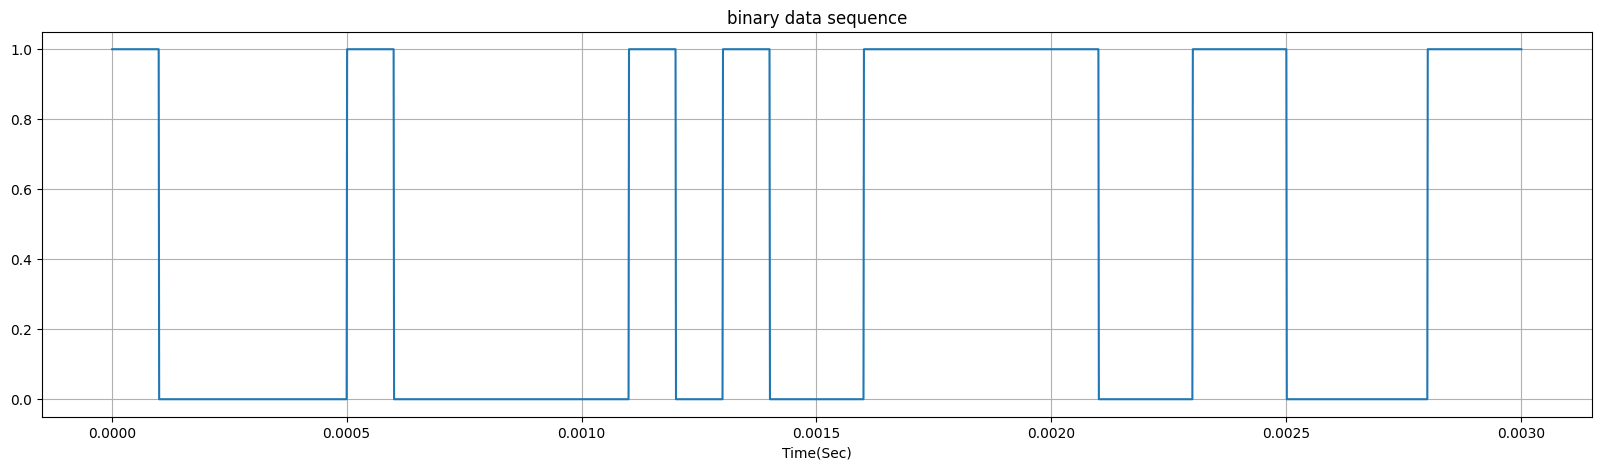

In [23]:
digit = np.empty((0,1), int)
for n in range(0,N):
    if x[n] == 1:
        sig = np.ones(nb)
    else:
        sig = np.zeros(nb)
    digit = np.append(digit, sig)
digit.reshape(-1)
plt.title("binary data sequence")
plt.xlabel('Time(Sec)')
plt.rcParams['figure.figsize'] = [20, 5]
plt.grid()
plt.plot(t1,digit)

+ Generate and plot the carrier signal

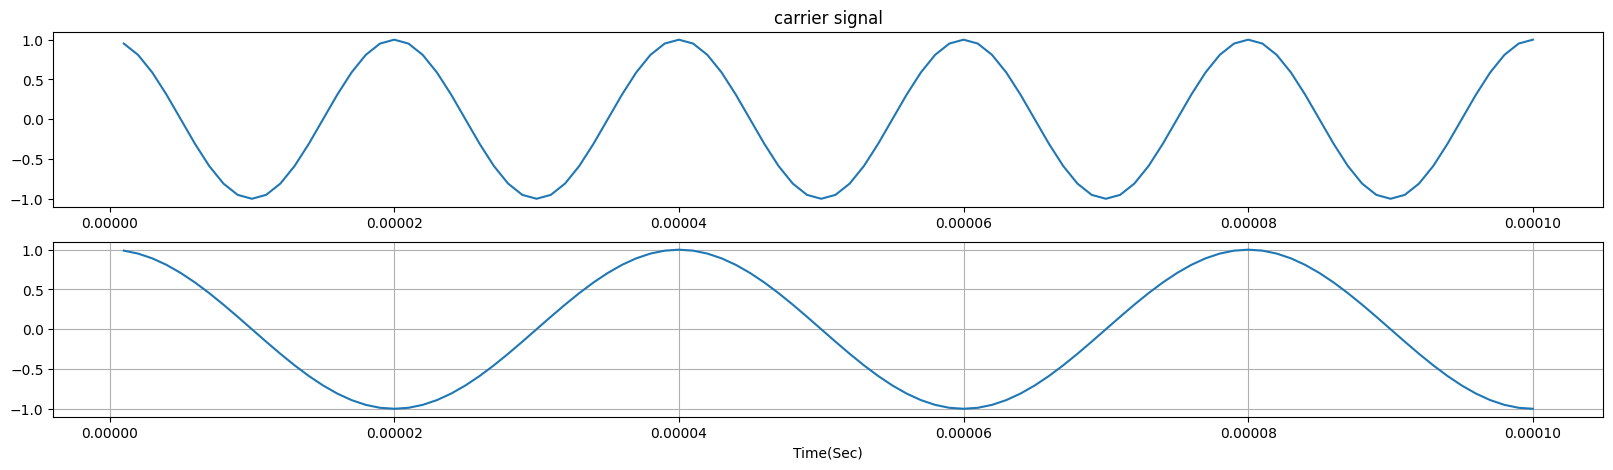

In [24]:
br = 1/Tb
fc1 = br*5
fc2 = br*2.5
t2 = np.arange(Tb/nb,nb*(Tb/nb)+(Tb/nb),Tb/nb)
cs1 = np.cos(2*np.pi*fc1*t2)
cs2 = np.cos(2*np.pi*fc2*t2)
plt.subplot(2, 1, 1)
plt.title("carrier signal")
plt.plot(t2, cs1)
plt.subplot(2, 1, 2)
plt.xlabel('Time(Sec)')
plt.plot(t2, cs2)
plt.grid()
plt.show()

+ Perform FSK modulation and plot the FSK modulated signal

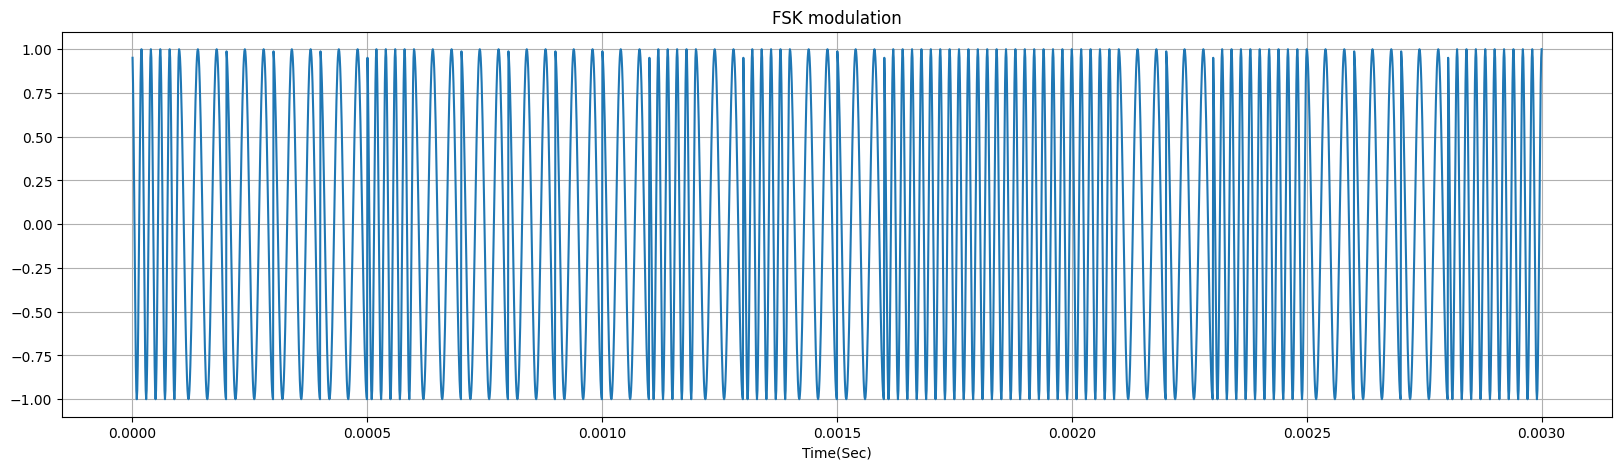

In [25]:
mod = np.empty((0,1), int)
for i in range(0,N):
    if x[i] == 1:
        y = cs1
    else:
        y = cs2
    mod = np.append(mod, y)
plt.title("FSK modulation")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t1, mod)
plt.show()

2. Demodulation

+ Correlate the PSK modulated signal with the carrier signal to generate decision variables

In [26]:
s = len(t2)
demod = np.empty((0,1), int)
for n in range(s, len(mod)+1, s):
    mm1 = cs1*mod[(n-(s)):n]
    mm2 = cs2*mod[(n-(s)):n]
    z1 = np.trapz(t2,mm1)
    z2 = np.trapz(t2,mm2)
    rz1 = np.round(2*z1/Tb)
    rz2 = np.round(2*z2/Tb)
    if rz1 > 0.5:
        a = 1
    elif rz2 > 0.5:
        a = 0
    demod = np.append(demod, a)

+ Obtain the demodulated binary data based on the decision variables

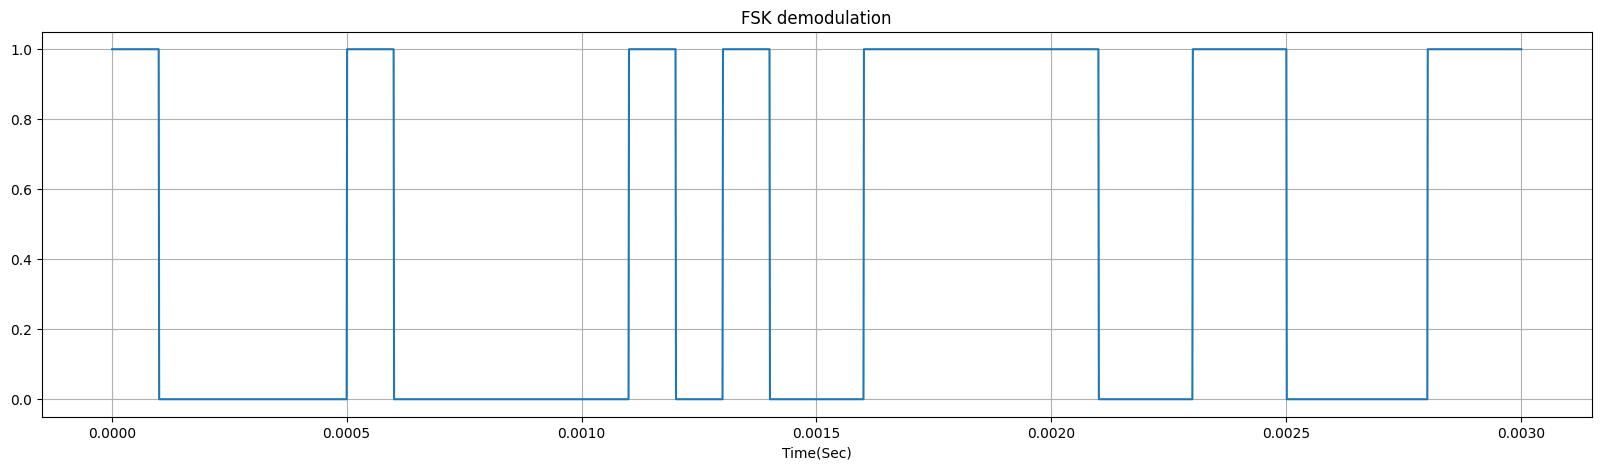

In [27]:
    rdigit = np.empty((0,1), int)
    for n in range(0, len(demod)):
        if demod[n] == 1:
            rsig = np.ones(nb)
        else:
            rsig = np.zeros(nb)
        rdigit = np.append(rdigit, rsig)
    t3 = np.arange(Tb/nb,nb*len(demod)*(Tb/nb)+(Tb/nb),Tb/nb)
    plt.title("FSK demodulation")
    plt.xlabel('Time(Sec)')
    plt.grid()
    plt.plot(t3, rdigit)
    plt.show()

3. Investigate the PSK modulation/demodulation under the effects of Gaussian noise

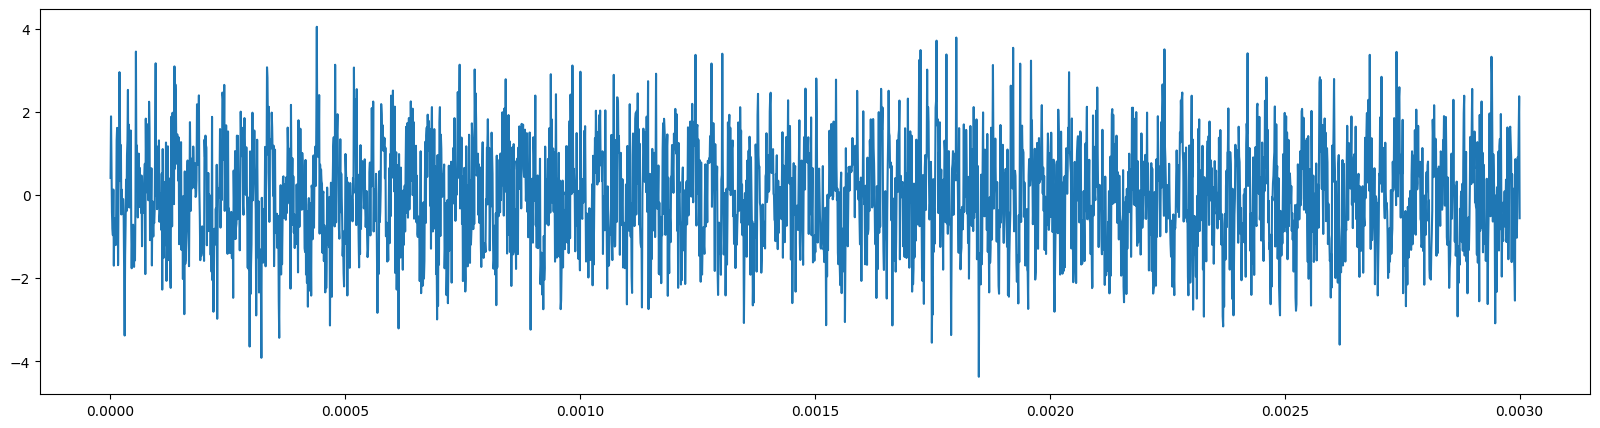

In [28]:
noise = np.random.normal(0,1,len(t1))
rt = mod + noise
plt.plot(t1,rt)

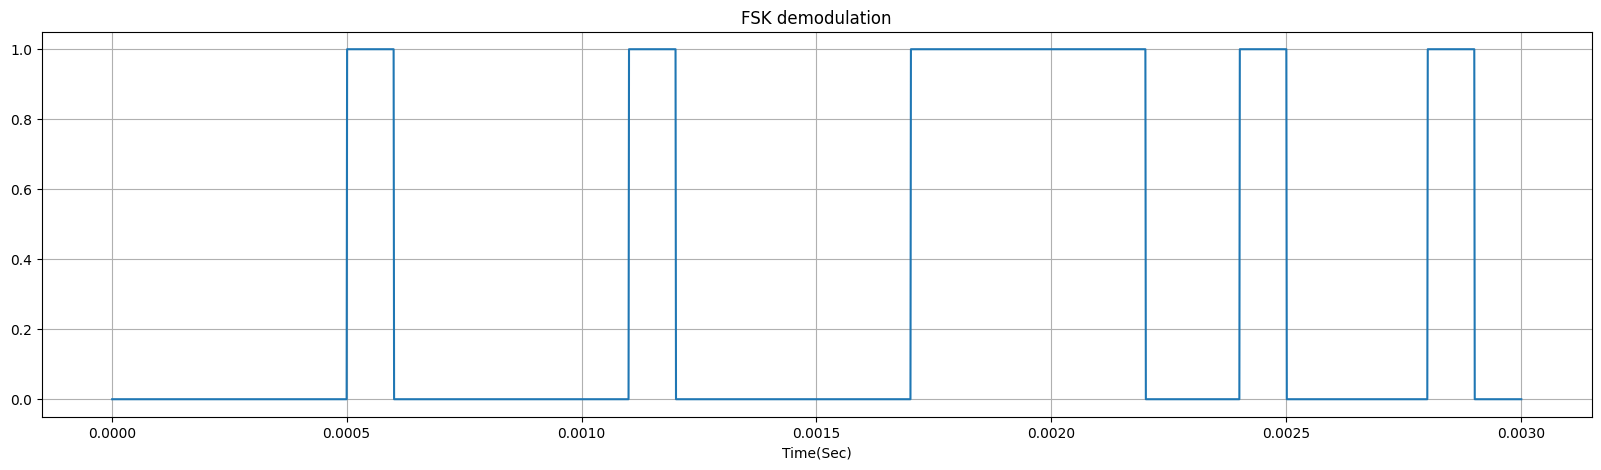

In [29]:
demod_n = np.empty((0,1), int)
for n in range(s, len(rt)+1, s):
    mm1 = cs1*rt[(n-(s)):n]
    mm2 = cs2*rt[(n-(s)):n]
    z1 = np.trapz(t2,mm1)
    z2 = np.trapz(t2,mm2)
    rz1 = np.round(2*z1/Tb)
    rz2 = np.round(2*z2/Tb)
    if rz1 > 0.5:
        a = 1
    elif rz2 > 0.5:
        a = 0
    demod_n = np.append(demod_n, a)
rdigit_n = np.empty((0,1), int)
for n in range(0, len(demod_n)):
    if demod_n[n] == 1:
        rsig = np.ones(nb)
    else:
        rsig = np.zeros(nb)
    rdigit_n = np.append(rdigit_n, rsig)
t3 = np.arange(Tb/nb,nb*len(demod_n)*(Tb/nb)+(Tb/nb),Tb/nb)
plt.title("FSK demodulation")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t3, rdigit_n)
plt.show()

In [30]:
cnt = 0
for i in range(len(demod_n)):
    if x[i] != demod_n[i]:
        cnt = cnt + 1
print("bit error probability: ", cnt/len(x))

bit error probability:  0.2
